<a href="https://colab.research.google.com/github/khloud-ibrahim/PersonalizedExam_app/blob/main/Preprocessing_FP_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving data_mining_exam_dataset.csv to data_mining_exam_dataset.csv


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("data_mining_exam_dataset.csv")
df.head()



,Student_ID,Question_ID,Topic,Difficulty,Question_Type,Student_Answer,Correct_Answer_Original,Score,Metric_1,Metric_2,Correctness_Flag,Features_Tags,Generated Question,Option A,Option B,Option C,Option D,Correct Option Letter,Time_Spent
0,student_id,question_id,topic,difficulty,question_type,student_answer,correct_answer,is_correct,score,time_spent,result,transaction,What is the correct term or concept related to...,Database Management,correct_answer,Operating System,Cloud Computing,B,NaN
1,S82,Q8,classification,Hard,tru/false,Decision Tree,Decision Tree,1,1,25,Correct,"['Student_S82', 'Topic_Classification', 'Diffi...","In the context of **Classification**, which of...",K-Nearest Neighbors,Decision Tree,Association Rule Mining,Regression,B,NaN
2,S29,Q9,CLUSTERING,Hard,MCQ,Initial centroids,Initial centroids,1,1,47,Correct,"['Student_S29', 'Topic_Clustering', 'Difficult...",Which of the following terms is most closely a...,Outlier Detection,DBSCAN,Principal Component Analysis,Initial centroids,D,NaN
3,S55,Q3,Classification,Easy,MCQ,Decision Tree,Decision Tree,1,1,24,Correct,"['Student_S55', 'Topic_Classification', 'Diffi...","In the context of **Classification**, which of...",Decision Tree,K-Nearest Neighbors,Association Rule Mining,Support Vector Machine,A,NaN
4,S65,Q39,classification,Hard,mcq,Decision Tree,Decision Tree,1,1,55,Correct,"['Student_S65', 'Topic_Classification', 'Diffi...","In the context of **Classification**, which of...",Support Vector Machine,Decision Tree,Association Rule Mining,Clustering,B,NaN


In [31]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Rename target column if needed
if "correctness_flag" in df.columns:
    df.rename(columns={"correctness_flag": "is_correct"}, inplace=True)


In [32]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()


In [33]:
#data inspection
#Data inspection was performed to understand data types and detect missing values.
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1200
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               1201 non-null   object 
 1   question_id              1201 non-null   object 
 2   topic                    1201 non-null   object 
 3   difficulty               1201 non-null   object 
 4   question_type            1201 non-null   object 
 5   student_answer           1071 non-null   object 
 6   correct_answer_original  1201 non-null   object 
 7   score                    1201 non-null   float64
 8   metric_1                 1201 non-null   object 
 9   metric_2                 1201 non-null   object 
 10  is_correct               1201 non-null   object 
 11  features_tags            1201 non-null   object 
 12  generated question       1201 non-null   object 
 13  option a                 1201 non-null   object 
 14  option b                 1201

,0
student_id,0
question_id,0
topic,0
difficulty,0
question_type,0
student_answer,130
correct_answer_original,0
score,0
metric_1,0
metric_2,0


In [34]:
#Remove Duplicates
#Duplicate rows were removed to avoid biased analysis
df.duplicated().sum()
df.drop_duplicates(inplace=True)



In [35]:
#Clean Text Columns
#Text normalization was applied to ensure consistency
text_cols = ["topic", "difficulty", "question_type"]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()



In [36]:
df.columns


Index(['student_id', 'question_id', 'topic', 'difficulty', 'question_type',
       'student_answer', 'correct_answer_original', 'score', 'metric_1',
       'metric_2', 'is_correct', 'features_tags', 'generated question',
       'option a', 'option b', 'option c', 'option d', 'correct option letter',
       'time_spent'],
      dtype='object')

In [37]:
df.columns = df.columns.str.strip().str.lower()
df.columns


Index(['student_id', 'question_id', 'topic', 'difficulty', 'question_type',
       'student_answer', 'correct_answer_original', 'score', 'metric_1',
       'metric_2', 'is_correct', 'features_tags', 'generated question',
       'option a', 'option b', 'option c', 'option d', 'correct option letter',
       'time_spent'],
      dtype='object')

In [38]:
if "difficulty" in df.columns:
    df["difficulty"] = df["difficulty"].astype(str).str.capitalize()



In [39]:
#handel missing values
# Categorical → Mode
for col in ["topic", "difficulty", "question_type"]:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical → Mean
df["time_spent"] = pd.to_numeric(df["time_spent"], errors="coerce")
df["time_spent"].fillna(df["time_spent"].mean(), inplace=True)

df["score"] = pd.to_numeric(df["score"], errors="coerce")
df["score"].fillna(0, inplace=True)




/tmp/ipython-input-2295656226.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2295656226.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [40]:
[col for col in df.columns if "correct" in col]


['correct_answer_original', 'is_correct', 'correct option letter']

In [41]:
df.rename(columns={"correctness_flag": "is_correct"}, inplace=True)


In [43]:
df["is_correct"].value_counts()


,count
is_correct,
Correct,769
Wrong,431
result,1


In [44]:
df["is_correct"] = df["is_correct"].astype(str).str.strip().str.lower()



In [45]:
df["is_correct"] = df["is_correct"].map({
    "1": 1,
    "0": 0,
    "true": 1,
    "false": 0,
    "correct": 1,
    "wrong": 0
})


In [46]:
# handel critical columns
#Rows with missing target values were removed

df.dropna(subset=["is_correct"], inplace=True)
df["is_correct"] = df["is_correct"].astype(int)



In [47]:
#Create Result Column
df["result"] = df["is_correct"].map({1: "Correct", 0: "Wrong"})
df[["is_correct", "result"]].head()


,is_correct,result
1,1,Correct
2,1,Correct
3,1,Correct
4,1,Correct
5,0,Wrong


In [48]:
#Create Transaction Column
#Transactions were created to prepare the data for association rule mining.
df["transaction"] = df.apply(
    lambda row: [
        f"Student_{row['student_id']}",
        f"Topic_{row['topic']}",
        f"Difficulty_{row['difficulty']}",
        f"Result_{row['result']}"
    ],
    axis=1
)

df["transaction"].head()


,transaction
1,"[Student_S82, Topic_classification, Difficulty..."
2,"[Student_S29, Topic_CLUSTERING, Difficulty_Har..."
3,"[Student_S55, Topic_Classification, Difficulty..."
4,"[Student_S65, Topic_classification, Difficulty..."
5,"[Student_S84, Topic_evaluation metrics, Diffic..."


In [49]:
#Train–Test Split
#The dataset was split into training and testing sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (960, 21)
Test size: (240, 21)


In [50]:
train_df.to_csv("train_processed.csv", index=False)
test_df.to_csv("test_processed.csv", index=False)


In [51]:
files.download("train_processed.csv")
files.download("test_processed.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# 1 Imports for Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# لتحسين شكل الرسومات
sns.set(style="whitegrid")


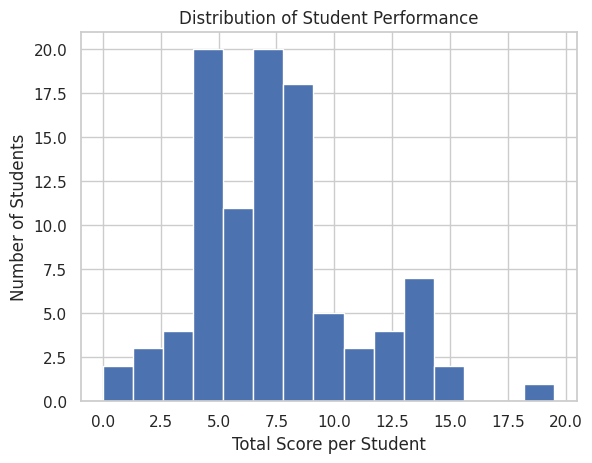

In [65]:
import matplotlib.pyplot as plt

student_scores = df.groupby("student_id")["score"].sum()

plt.figure()
plt.hist(student_scores, bins=15)
plt.xlabel("Total Score per Student")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Performance")
plt.show()


In [96]:
# اطبعي الأسماء عشان نشوف إيه المشكلة
print("Topics:", accuracy_topic.index.tolist())
print("Number of topics:", len(accuracy_topic))

Topics: ['APIORI', 'APRIOI', 'APRIORI', 'APRIRI', 'APRORI', 'ARIORI', 'ASOCIATION RULES', 'ASSCIATION RULES', 'ASSOCATION RULES', 'ASSOCIAION RULES', 'ASSOCIATION RULES', 'ASSOCIATION RULS', 'ASSOCIATION ULES', 'ASSOCIATON RULES', 'ASSOCITION RULES', 'ASSOIATION RULES', 'Apiori', 'Apriori', 'Aprori', 'Ariori', 'Associatio Rules', 'Association Rules', 'Association ules', 'CASSIFICATION', 'CLASIFICATION', 'CLASSFICATION', 'CLASSIFICATIN', 'CLASSIFICATION', 'CLASSIFICATON', 'CLASSIICATION', 'CLSTERING', 'CLUSERING', 'CLUSTEING', 'CLUSTERING', 'CLUSTRING', 'CLUTERING', 'CUSTERING', 'Classfication', 'Classifcation', 'Classifiation', 'Classification', 'Clssification', 'Clusteing', 'Clusterig', 'Clustering', 'Clusterng', 'Clutering', 'DAT PREPROCESSING', 'DATA PREPOCESSING', 'DATA PREPRCESSING', 'DATA PREPROCESSING', 'DATA PREPROCESSNG', 'DATA PREPROCSSING', 'DATA PRPROCESSING', 'DATA REPROCESSING', 'DTA PREPROCESSING', 'Daa Preprocessing', 'Dat Preprocessing', 'Data Preprocessing', 'Data Pre

In [97]:
# امسحي التكرار
accuracy_topic = accuracy_topic.reset_index()
accuracy_topic = accuracy_topic.drop_duplicates(subset='topic')
accuracy_topic = accuracy_topic.set_index('topic')['is_correct']

In [98]:
# نضيف الداتا قبل الـ groupby
df['topic'] = df['topic'].str.strip()  # شيل المسافات الزيادة

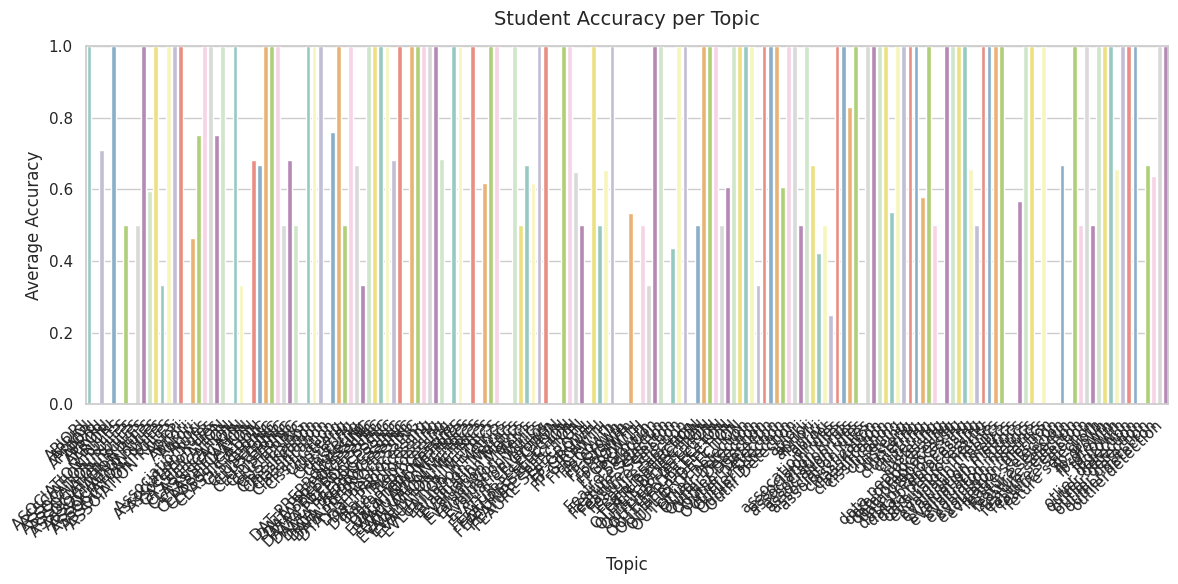

In [99]:
# Accuracy per Topic
accuracy_topic = df.groupby("topic")["is_correct"].mean()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=range(len(accuracy_topic)),  # استخدمي أرقام بدل الأسماء
    y=accuracy_topic.values,
    hue=accuracy_topic.index,
    palette="Set3",
    legend=False
)
plt.title("Student Accuracy per Topic", fontsize=14, pad=15)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Average Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.xticks(
    range(len(accuracy_topic)),  # مواضع الأرقام
    accuracy_topic.index,  # الأسماء الحقيقية
    rotation=45,
    ha='right'
)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

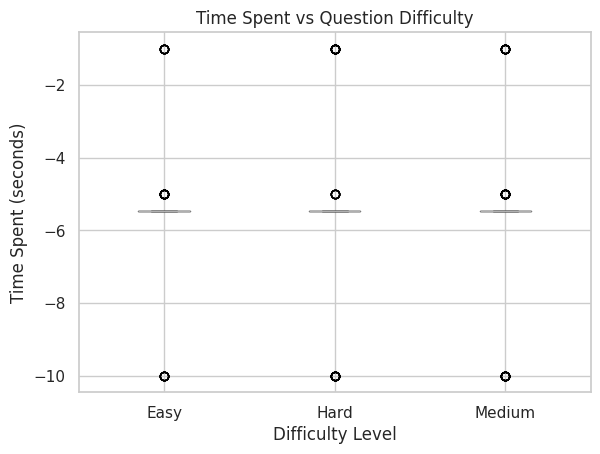

In [100]:
plt.figure()
df.boxplot(column="time_spent", by="difficulty")
plt.xlabel("Difficulty Level")
plt.ylabel("Time Spent (seconds)")
plt.title("Time Spent vs Question Difficulty")
plt.suptitle("")
plt.show()
